# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st 
import numpy as np



# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_metadata_df = pd.DataFrame(mouse_metadata)
study_results_df = pd.DataFrame(study_results)


mousemeta_study_df = study_results_df.merge(mouse_metadata_df, how='left')

# Display the data table for preview
mousemeta_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mouse_count = len(mouse_metadata)





mouse_count


249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mousemeta_study_df [mousemeta_study_df.duplicated(['Mouse ID'])]







,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
250,a275,5,46.795257,0,Ceftamin,Female,20,28
251,w575,5,48.913860,1,Zoniferol,Female,16,28
252,x822,5,45.671104,1,Ceftamin,Male,3,29
253,l509,5,45.851193,0,Capomulin,Male,17,21
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [4]:
# Optional: Get all the data for the duplicate mouse ID.

mousemeta_study_df[mousemeta_study_df["Mouse ID"] == 'g989']


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mouse = mousemeta_study_df.loc[mousemeta_study_df["Mouse ID"]!="g989"]


cleaned_mouse_df= pd.DataFrame(cleaned_mouse)


cleaned_mouse_df.head()

 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count =cleaned_mouse_df["Mouse ID"].nunique()

clean_mouse_count


 

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame



volume_mean = cleaned_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
volume_median = cleaned_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
volume_variance =cleaned_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
volume_std_dev = cleaned_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem_volume=cleaned_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()



# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen     
descriptive_stats=pd.DataFrame({'Mean Tumor Volume':volume_mean,
'Median Tumor Volume': volume_median,
'Tumor Volume Variance': volume_variance,
'Tumor Volume Std. Dev.' : volume_std_dev,
'Tumor Volume Std. Err.' : sem_volume

})

cleaned_descriptive_data= descriptive_stats.dropna(subset=['Mean Tumor Volume'])


cleaned_descriptive_data





,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:

# Using the aggregation method, produce the same summary statistics in a single line.
descriptive_data_ag=cleaned_mouse_df.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)': [ 'mean','median','var','std','sem']})

descriptive_data_ag

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

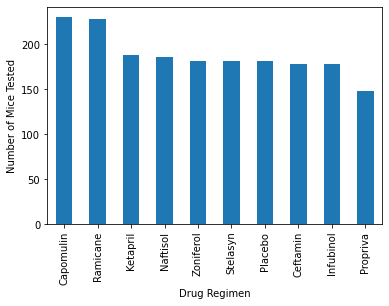

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
""" x_axis= clean_mouse_count
drug_Regimen = ['Capomulin','Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol',
'Placebo', 'Propriva', 'Ramicane','Stelasyn', 'Zoniferol'] """


regimen_groupby= cleaned_mouse_df["Drug Regimen"].value_counts()


#plt.bar(x_axis, drug_Regimen, align="center")

regimen_groupby.plot(kind='bar')

plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')

plt.show()











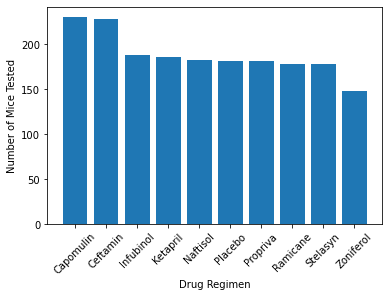

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.


drug_Regimen = ['Capomulin','Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol',
'Placebo', 'Propriva', 'Ramicane','Stelasyn', 'Zoniferol']

plt.bar(drug_Regimen,regimen_groupby, align="center") 
plt.xticks(rotation=45)

plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')

plt.show()

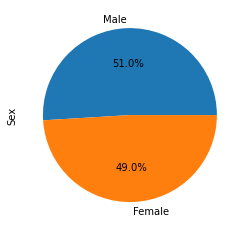

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
regimen_pie= cleaned_mouse_df["Sex"].value_counts()

regimen_pie.plot(kind='pie',autopct='%1.1f%%')
plt.show()

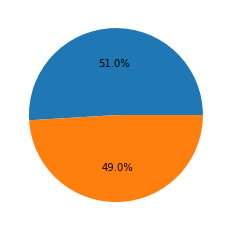

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(regimen_pie,autopct='%1.1f%%')
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
region_list=['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
# Start by getting the last (greatest) timepoint for each mouse
max_timepoint=cleaned_mouse_df.groupby('Mouse ID')[['Timepoint']].max()
max_timepoint=max_timepoint.reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_df=pd.merge(cleaned_mouse_df,max_timepoint,how='right',on=['Mouse ID','Timepoint'])
merge_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,f932,0,45.000000,0,Ketapril,Male,15,29
1,x336,0,45.000000,0,Naftisol,Female,4,29
2,h428,0,45.000000,0,Ketapril,Female,1,27
3,v199,0,45.000000,0,Naftisol,Female,17,29
4,o848,0,45.000000,0,Stelasyn,Female,14,27
...,...,...,...,...,...,...,...,...
243,r944,45,41.581521,2,Capomulin,Male,12,25
244,u364,45,31.023923,3,Capomulin,Male,18,17
245,p438,45,61.433892,1,Ceftamin,Female,11,26
246,x773,45,58.634971,4,Placebo,Female,21,30


In [14]:
 #Put treatments into a list for for loop (and later for plot labels)

region_list=['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for r in region_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    int_df= merge_df.loc[merge_df['Drug Regimen']==r]['Tumor Volume (mm3)']
    

    
    # add subset 
    tumor_vol.append(int_df)
    
    # Determine outliers using upper and lower bounds
    Q3 = np.quantile(int_df, 0.75)
    Q1 = np.quantile(int_df, 0.25)
    IQR = Q3 - Q1
    #print(r)
    #print(Q3)
   #print(Q1)
    #print(IQR)

 
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    #print(lower_range,upper_range)
    outlier=int_df[(int_df<lower_range)|(int_df>upper_range)]
    print(f"{r}'s potential outliers:{outlier}")

Capomulin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:20    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)


In [15]:
int_df

7      45.000000
8      45.000000
10     45.000000
11     45.000000
25     47.784682
33     46.784535
51     48.722078
66     52.925348
69     56.057749
92     55.742829
94     57.918381
109    64.192341
120    59.851956
121    64.729837
122    68.594745
127    61.849023
145    67.527482
165    67.748662
210    64.634949
211    62.999356
213    68.923185
217    61.386660
219    64.299830
227    59.741901
245    61.433892
Name: Tumor Volume (mm3), dtype: float64

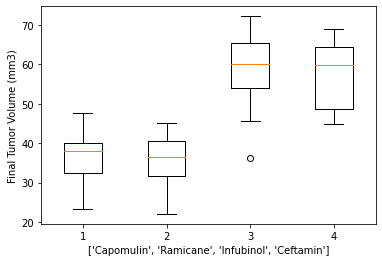

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_xlabel(region_list)
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_vol)
plt.show()



In [17]:

plot_df= cleaned_mouse_df[cleaned_mouse_df['Drug Regimen'] == 'Capomulin']
plot_df= plot_df[plot_df['Mouse ID']=='i557']
plot_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
246,i557,0,45.000000,0,Capomulin,Female,1,24
365,i557,5,42.261665,0,Capomulin,Female,1,24
574,i557,10,42.992077,0,Capomulin,Female,1,24
860,i557,15,43.529876,0,Capomulin,Female,1,24
1052,i557,20,43.967895,0,Capomulin,Female,1,24
1157,i557,25,44.596219,0,Capomulin,Female,1,24
1309,i557,30,45.261384,0,Capomulin,Female,1,24
1573,i557,35,45.941949,0,Capomulin,Female,1,24
1712,i557,40,46.821070,1,Capomulin,Female,1,24
1878,i557,45,47.685963,1,Capomulin,Female,1,24


## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin treatement of mouse i557')

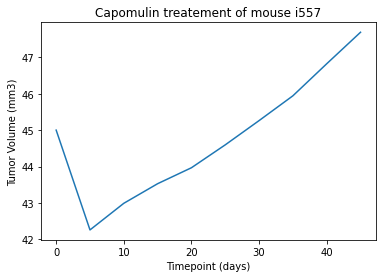

In [18]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin




plt.plot(plot_df['Timepoint'], plot_df['Tumor Volume (mm3)'])



plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatement of mouse i557")


In [23]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

scatter_df= cleaned_mouse_df[cleaned_mouse_df['Drug Regimen'] == 'Capomulin']
scatter_df2 = scatter_df.groupby('Weight (g)')['Tumor Volume (mm3)'].agg('mean').reset_index()



scatter_df2.describe()




,Weight (g),Tumor Volume (mm3)
count,9.000000,9.000000
mean,20.666667,41.256197
std,3.278719,3.086410
min,15.000000,36.182040
25%,19.000000,39.141053
50%,21.000000,42.088700
75%,23.000000,43.341051
max,25.000000,44.805810


Text(0, 0.5, 'Average Tumor Volume(mm3)')

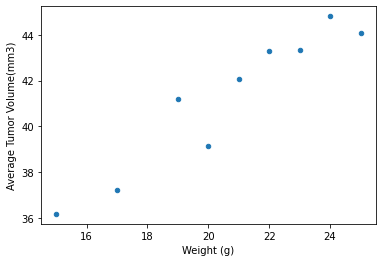

In [29]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen



plt1=scatter_df2.plot(kind="scatter", y="Tumor Volume (mm3)", x="Weight (g)")
plt1.set_xlabel("Weight (g)")
plt1.set_ylabel("Average Tumor Volume(mm3)")


## Correlation and Regression

In [31]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

scatter_df2.corr()

,Weight (g),Tumor Volume (mm3)
Weight (g),1.000000,0.950524
Tumor Volume (mm3),0.950524,1.000000


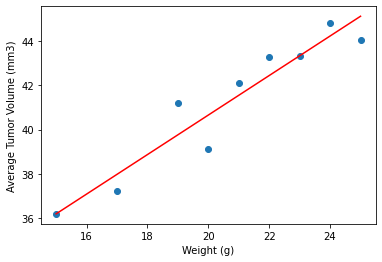

In [37]:
from scipy import stats
plt_slope, plt_int, plt_r, plt_p, plt_std_err = stats.linregress(scatter_df2['Weight (g)'],scatter_df2['Tumor Volume (mm3)']) 
plt_fit= plt_int + plt_slope * scatter_df2['Weight (g)']

plt.scatter(scatter_df2['Weight (g)'],scatter_df2['Tumor Volume (mm3)']) 
plt.plot(scatter_df2['Weight (g)'] ,plt_fit, 'r')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()